# Install packages



In [ ]:
!pip install eli5
!pip install lifelines
!pip install shap

In [39]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 3.8 MB/s eta 0:00:00


# Neural net

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import gdown
!gdown 1hzORLs6tpovVNGrvoadzJc-QrNgiD_Gh

Downloading...
From: https://drive.google.com/uc?id=1hzORLs6tpovVNGrvoadzJc-QrNgiD_Gh
To: /content/X4.csv
100% 229M/229M [00:01<00:00, 155MB/s]


In [3]:
#  Загрузка нейросети из файла
from tensorflow.keras.models import load_model
model = load_model('neuro4')

In [4]:
#model_l2 = load_model('neuro4_l2')

OSError: ignored

In [3]:
import pandas as pd
X4 = pd.read_csv('X4.csv')

In [4]:
X4

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,0,False


In [10]:
X4 = X4.astype({'is_valid': 'int32'})
X4

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,1,0
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,1,0
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,0,0
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,0,0
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,0,0
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,0,0
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,0,0
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,0,0


In [11]:
X4.dtypes

CHROM_num         int64
POS               int64
QUAL            float64
GQ                int64
DP                int64
AD_ref            int64
AD_alt            int64
VAF             float64
PL_0/0            int64
PL_0/1            int64
PL_1/1            int64
ref_alt_diff      int64
is_valid          int32
dtype: object

In [5]:
features4 = list(X4.columns)
features4.remove('is_valid')
features4

['CHROM_num',
 'POS',
 'QUAL',
 'GQ',
 'DP',
 'AD_ref',
 'AD_alt',
 'VAF',
 'PL_0/0',
 'PL_0/1',
 'PL_1/1',
 'ref_alt_diff']

In [8]:
from sklearn.preprocessing import StandardScaler
 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X4[features4])

StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split

# Separate the test data
x_train, x_val_test, y_train, y_val_test = train_test_split(X4[features4], X4['is_valid'], test_size=0.3, shuffle=True, random_state=42)

# Split the remaining data to train and validation
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, shuffle=True, random_state=42)

In [10]:
x_train_std = scaler.transform(x_train)
x_val_std = scaler.transform(x_val)
x_test_std = scaler.transform(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

In [12]:
preds = np.round(model.predict(x_test_std), 0)

21492/21492 [==============================] - 40s 2ms/step


In [ ]:
preds_l2 = np.round(model_l2.predict(x_test_std), 0)

In [13]:
# confusion matrix
cm = confusion_matrix(y_test, preds) # order matters! (actual, predicted)

In [ ]:
cm_l2 = confusion_matrix(y_test, preds_l2)

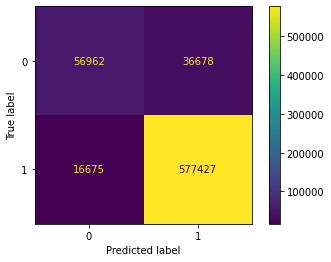

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#, display_labels=[])
disp.plot()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp_l2 = ConfusionMatrixDisplay(confusion_matrix=cm_l2)#, display_labels=[])
disp_l2.plot()

In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.77      0.61      0.68     93640
        True       0.94      0.97      0.96    594102

    accuracy                           0.92    687742
   macro avg       0.86      0.79      0.82    687742
weighted avg       0.92      0.92      0.92    687742



In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [17]:
precision_score(y_test, preds)

0.9402740573680397

In [18]:
recall_score(y_test, preds)

0.9719324291114994

In [19]:
f1_score(y_test, preds)

0.9558411762222864

In [20]:
from keras.utils.vis_utils import plot_model

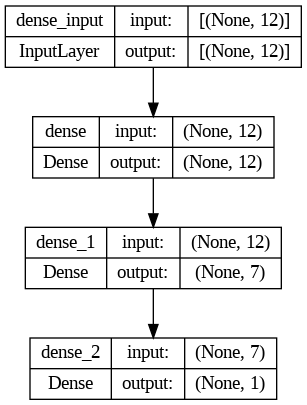

In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
f1_score(y_test, preds_l2)

In [ ]:
from eli5.sklearn import PermutationImportance
import eli5

In [ ]:
perm = PermutationImportance(model, random_state=1, scoring='roc_auc').fit(x_test_std, y_test)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

In [ ]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import lifelines
import shap

In [ ]:
#e = shap.KernelExplainer(model, x_train_std)
#shap_values = e.shap_values(x_test_std)

# Prep data for NeuroSimulator

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the test data
x_train, x_val_test, y_train, y_val_test = train_test_split(X4[features4], X4['is_valid'], test_size=0.3, shuffle=True, random_state=42)

# Split the remaining data to train and validation
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, shuffle=True, random_state=42)

## Proof of concept

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)

(3209459, 12) (687741, 12) (687742, 12)


In [ ]:
mini_train = x_train.sample(frac=0.05, random_state=1)
mini_val = x_val.sample(frac=0.05, random_state=1)
mini_test = x_test.sample(frac=0.05, random_state=1)
mini_train

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
656864,2,198178317,64.4,60,30,0,30,1.000000,64,61,0,0
1446530,5,32742264,44.9,45,36,19,17,0.472222,44,0,57,0
951676,3,135672443,67.4,62,32,0,32,1.000000,67,63,0,0
3193540,12,25515760,65.4,62,45,1,44,0.977778,65,65,0,0
3183877,12,20176741,52.7,53,30,12,18,0.600000,52,0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...
591697,2,154540031,43.7,44,32,16,16,0.500000,43,0,62,0
2531985,9,30207633,55.3,55,25,0,25,1.000000,55,64,0,0
2434070,8,124617219,39.8,40,45,31,14,0.311111,39,0,65,0
885580,3,95107952,40.4,40,27,16,11,0.407407,40,0,65,0


In [ ]:
print(mini_train.shape, mini_val.shape, mini_test.shape)

(160473, 12) (34387, 12) (34387, 12)


## Automation

In [23]:
full_Xs = [x_train, x_val, x_test]
full_Ys = [y_train, y_val, y_test]

In [32]:
len(x_train.columns)

12

In [33]:
[f'X{i}' for i in range(1, len(x_train.columns) + 1)] + ['D1']

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'D1']

In [34]:
mini_dfs = []
for i in range(len(full_Xs)):
  mini_df = full_Xs[i].copy()
  mini_df['D1'] = full_Ys[i]
  mini_df.columns = [f'X{i}' for i in range(1, len(x_train.columns) + 1)] + ['D1']
  mini_dfs.append(mini_df.sample(frac=0.05, random_state=1))

In [35]:
mini_dfs[0]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,D1
656864,2,198178317,64.4,60,30,0,30,1.000000,64,61,0,0,1
1446530,5,32742264,44.9,45,36,19,17,0.472222,44,0,57,0,1
951676,3,135672443,67.4,62,32,0,32,1.000000,67,63,0,0,1
3193540,12,25515760,65.4,62,45,1,44,0.977778,65,65,0,0,1
3183877,12,20176741,52.7,53,30,12,18,0.600000,52,0,66,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591697,2,154540031,43.7,44,32,16,16,0.500000,43,0,62,0,1
2531985,9,30207633,55.3,55,25,0,25,1.000000,55,64,0,0,1
2434070,8,124617219,39.8,40,45,31,14,0.311111,39,0,65,0,1
885580,3,95107952,40.4,40,27,16,11,0.407407,40,0,65,0,0


In [36]:
mini_dfs[1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,D1
1687479,6,8886346,47.5,47,26,11,15,0.576923,47,0,58,4,1
3788204,15,73182196,62.5,60,45,0,45,1.000000,62,64,0,0,1
4513628,21,44417341,47.9,44,36,1,35,0.972222,47,46,0,0,0
893437,3,99234818,70.3,69,31,1,30,0.967742,70,75,0,1,1
1361452,4,182980941,54.2,54,32,16,16,0.500000,54,0,67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480919,5,55678647,14.5,14,18,0,17,0.944444,14,0,33,2,0
3243255,12,55110070,37.8,38,32,16,16,0.500000,37,0,59,0,1
471796,2,65972570,36.3,36,44,24,20,0.454545,36,0,62,0,1
1712166,6,23318047,61.8,55,35,0,35,1.000000,61,56,0,0,1


In [37]:
mini_dfs[2]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,D1
2569911,9,73138078,37.1,37,31,16,15,0.483871,37,0,64,0,1
887050,3,96067717,33.8,34,31,19,12,0.387097,33,0,61,0,1
3136845,11,131194429,64.8,63,37,0,37,1.000000,64,68,0,0,1
3189835,12,23528306,60.1,58,33,0,33,1.000000,60,62,0,0,1
3877963,16,19317553,18.3,18,25,14,11,0.440000,18,0,42,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525674,22,16693605,57.0,53,29,0,29,1.000000,56,55,0,0,1
3333331,12,117044460,45.1,45,28,17,11,0.392857,45,0,63,0,1
1291198,4,143141264,38.7,39,32,15,17,0.531250,38,0,59,0,1
2111572,7,83446811,61.7,59,47,0,47,1.000000,61,62,0,0,1


In [49]:
writer = pd.ExcelWriter('vcf_5_percent_noInd.xlsx', engine='xlsxwriter')

mini_dfs[0].to_excel(writer, sheet_name='train', index=False)
mini_dfs[1].to_excel(writer, sheet_name='val', index=False)
mini_dfs[2].to_excel(writer, sheet_name='test', index=False)

writer.close()

In [47]:
!ls -lh

total 233M
drwx------ 6 root root 4.0K Mar 29 17:20 drive
drwxr-xr-x 1 root root 4.0K Mar 28 13:52 sample_data
-rw-r--r-- 1 root root  15M Mar 29 17:23 vcf_5_percent.xlsx
-rw-r--r-- 1 root root 219M Mar 29 16:35 X4.csv


In [50]:
!cp vcf_5_percent_noInd.xlsx /content/drive/MyDrive/BTC/data

## Validation

In [52]:
ns = pd.read_excel('/content/preds_tang.xlsx')
ns

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,D1,Y1,E1
0,9,73138078,37.1,37,31,16,15,0.483871,37,0,64,0,1,0.9714,0.0286
1,3,96067717,33.8,34,31,19,12,0.387097,33,0,61,0,1,0.9484,0.0516
2,11,131194429,64.8,63,37,0,37,1.000000,64,68,0,0,1,0.9821,0.0179
3,12,23528306,60.1,58,33,0,33,1.000000,60,62,0,0,1,0.9681,0.0319
4,16,19317553,18.3,18,25,14,11,0.440000,18,0,42,1,0,0.3788,0.3788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34382,22,16693605,57.0,53,29,0,29,1.000000,56,55,0,0,1,0.8878,0.1122
34383,12,117044460,45.1,45,28,17,11,0.392857,45,0,63,0,1,0.9869,0.0131
34384,4,143141264,38.7,39,32,15,17,0.531250,38,0,59,0,1,0.9555,0.0445
34385,7,83446811,61.7,59,47,0,47,1.000000,61,62,0,0,1,0.9686,0.0314


In [53]:
ns['is_valid'] = ns['Y1'].round()
ns

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,D1,Y1,E1,is_valid
0,9,73138078,37.1,37,31,16,15,0.483871,37,0,64,0,1,0.9714,0.0286,1.0
1,3,96067717,33.8,34,31,19,12,0.387097,33,0,61,0,1,0.9484,0.0516,1.0
2,11,131194429,64.8,63,37,0,37,1.000000,64,68,0,0,1,0.9821,0.0179,1.0
3,12,23528306,60.1,58,33,0,33,1.000000,60,62,0,0,1,0.9681,0.0319,1.0
4,16,19317553,18.3,18,25,14,11,0.440000,18,0,42,1,0,0.3788,0.3788,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34382,22,16693605,57.0,53,29,0,29,1.000000,56,55,0,0,1,0.8878,0.1122,1.0
34383,12,117044460,45.1,45,28,17,11,0.392857,45,0,63,0,1,0.9869,0.0131,1.0
34384,4,143141264,38.7,39,32,15,17,0.531250,38,0,59,0,1,0.9555,0.0445,1.0
34385,7,83446811,61.7,59,47,0,47,1.000000,61,62,0,0,1,0.9686,0.0314,1.0


In [59]:
precision_score(ns['D1'], ns['is_valid'])

0.9319994853319609

In [58]:
recall_score(ns['D1'], ns['is_valid'])

0.973457868566053

In [56]:
f1_score(ns['D1'], ns['is_valid'])

0.9522776572668114

# Clean XGB vis

In [ ]:
import pickle
xgb4 = pickle.load(open('/content/xgb_4_no_scale.sav', 'rb'))

In [ ]:
# plot decision tree
from xgboost import plot_tree
import matplotlib.pyplot as plt

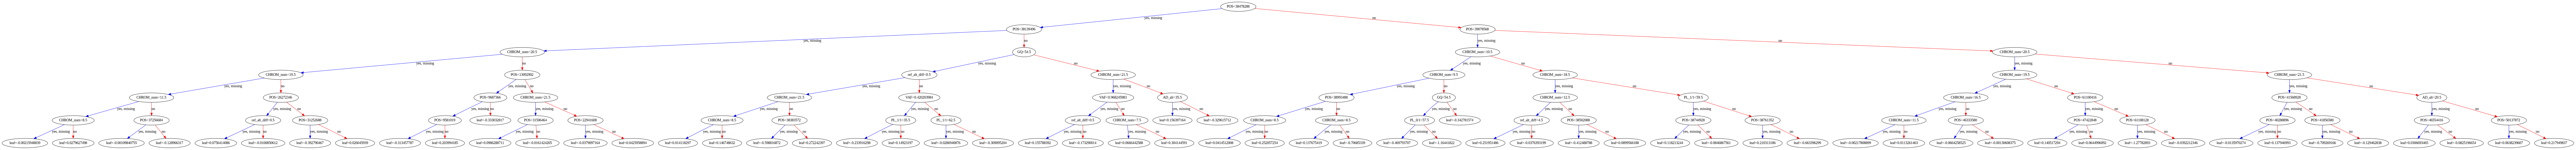

In [ ]:
fig, ax = plt.subplots(figsize=(300, 300))
plot_tree(xgb4, num_trees=99, ax=ax)
plt.savefig("xgb4_n-99.png")
plt.show()

In [ ]:
from xgboost import plot_importance

In [ ]:
xgb4.feature_importances_

array([0.02868365, 0.01770337, 0.0111761 , 0.65457094, 0.03099453,
       0.01546138, 0.01175894, 0.0135484 , 0.05235287, 0.0158115 ,
       0.07601283, 0.07192542], dtype=float32)

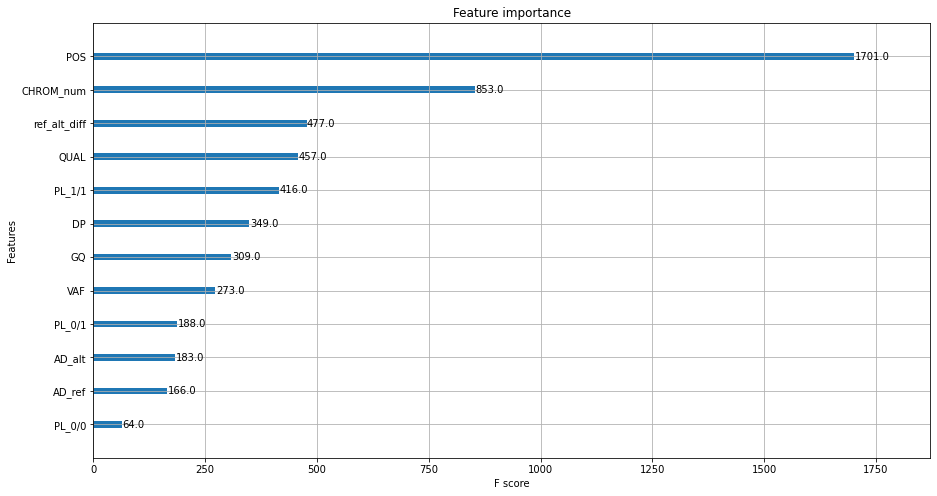

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_importance(xgb4, ax=ax)
plt.savefig("xgb4_importance.png")
plt.show()

# Dirty XGB vis

In [ ]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# plot decision tree
from xgboost import plot_tree
import matplotlib.pyplot as plt

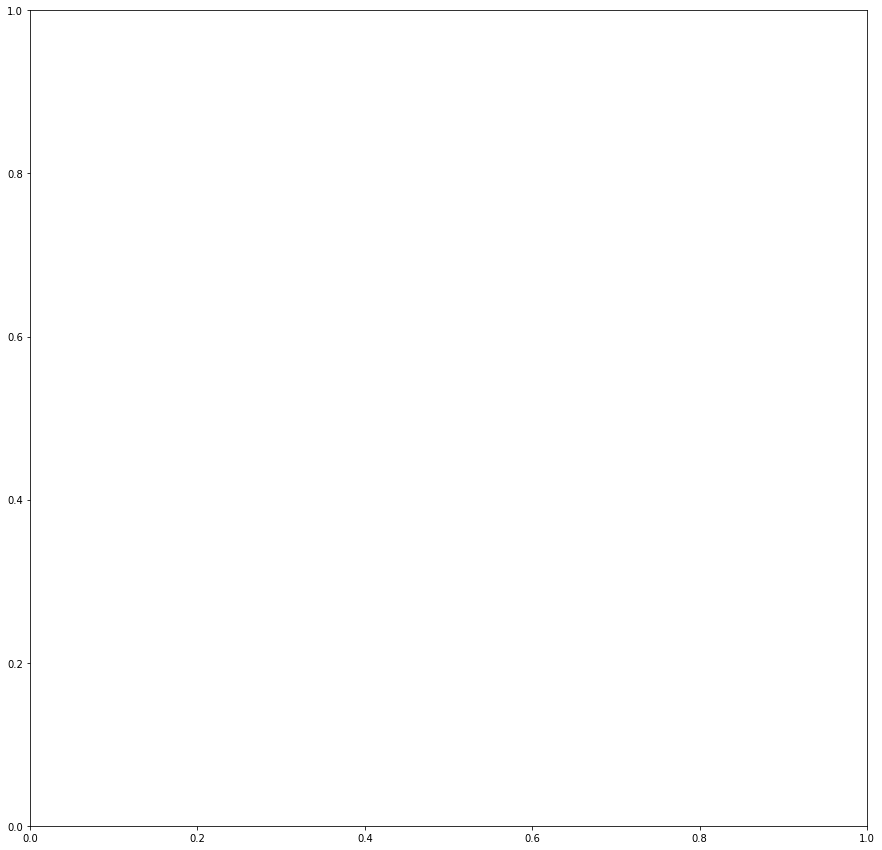

In [ ]:
# plot single tree
fig, ax = plt.subplots(figsize=(15, 15))
ax = plot_tree(xgb4)
fig.savefig('tree_visualization.png') 
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, ax=ax)
fig.savefig('params_corr_plot')
plt.show()

In [ ]:
xgb4

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
fig, ax = plt.subplots(figsize=(500, 500))
plot_tree(xgb4, num_trees=99, ax=ax)
plt.savefig("xgb4_n-99.png")
plt.show()

In [ ]:
plt.savefig('tree_visualization.png') 

<Figure size 432x288 with 0 Axes>

In [ ]:
import os
import logging

In [ ]:
def plot_tree(model, directory, num_tree=10):
  """Creates and saves a plot of the trees in a gradient boosted tree model.

  Args:
    model: xgb.Booster trained XGBoost gradient boosted trees model
    directory: string directory of save location
    num_tree: number of trees to plot
  """
  base_path = '{}/{}'.format('/content', directory)
  os.makedirs(base_path)

  for tree_idx in range(num_tree):
    xgb4.plot_tree(model, num_trees=tree_idx)
    fig = plt.gcf()
    fig.set_size_inches(120, 120)

    path = '{}/tree-{}.png'.format(base_path, tree_idx)
    fig.savefig(path)

  logging.info('Saved plots to: %s \n', base_path)
  plt.close('all')

In [ ]:
plot_tree(xgb4,'xgb4_vis', num_tree=10)

AttributeError: ignored